## MLP NN Regression to predict the count of bike share

#### Import libraries

In [17]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

#### Fetch the dataset 

In [18]:
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 

#### Load and reshape the dataset

In [19]:
# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

# convert y to shape of (samples, )
y = np.array(object=y)
y = y.ravel()
  
# metadata 
# print(bike_sharing.metadata) 
  
# variable information 
print(bike_sharing.variables) 

          name     role         type demographic  \
0      instant       ID      Integer        None   
1       dteday  Feature         Date        None   
2       season  Feature  Categorical        None   
3           yr  Feature  Categorical        None   
4         mnth  Feature  Categorical        None   
5           hr  Feature  Categorical        None   
6      holiday  Feature       Binary        None   
7      weekday  Feature  Categorical        None   
8   workingday  Feature       Binary        None   
9   weathersit  Feature  Categorical        None   
10        temp  Feature   Continuous        None   
11       atemp  Feature   Continuous        None   
12         hum  Feature   Continuous        None   
13   windspeed  Feature   Continuous        None   
14      casual    Other      Integer        None   
15  registered    Other      Integer        None   
16         cnt   Target      Integer        None   

                                          description units mis

In [20]:
print(X.head())
print(X.shape, y.shape)

       dteday  season  yr  mnth  hr  holiday  weekday  workingday  weathersit  \
0  2011-01-01       1   0     1   0        0        6           0           1   
1  2011-01-01       1   0     1   1        0        6           0           1   
2  2011-01-01       1   0     1   2        0        6           0           1   
3  2011-01-01       1   0     1   3        0        6           0           1   
4  2011-01-01       1   0     1   4        0        6           0           1   

   temp   atemp   hum  windspeed  
0  0.24  0.2879  0.81        0.0  
1  0.22  0.2727  0.80        0.0  
2  0.22  0.2727  0.80        0.0  
3  0.24  0.2879  0.75        0.0  
4  0.24  0.2879  0.75        0.0  
(17379, 13) (17379,)


#### Drop irrelevant features

As the features `dteday` (date) and `yr` (year, either 0 or 1 to indicate if the data is collected on the first or the second year) are irrelevant, we drop them.

In [21]:
X = X.drop(axis=1, columns=['dteday', 'yr'])

In [22]:
X = pd.DataFrame(X)

print(X.head())

   season  mnth  hr  holiday  weekday  workingday  weathersit  temp   atemp  \
0       1     1   0        0        6           0           1  0.24  0.2879   
1       1     1   1        0        6           0           1  0.22  0.2727   
2       1     1   2        0        6           0           1  0.22  0.2727   
3       1     1   3        0        6           0           1  0.24  0.2879   
4       1     1   4        0        6           0           1  0.24  0.2879   

    hum  windspeed  
0  0.81        0.0  
1  0.80        0.0  
2  0.80        0.0  
3  0.75        0.0  
4  0.75        0.0  


#### Normalise the data

Text(0.5, 1.0, 'After Normalisation')

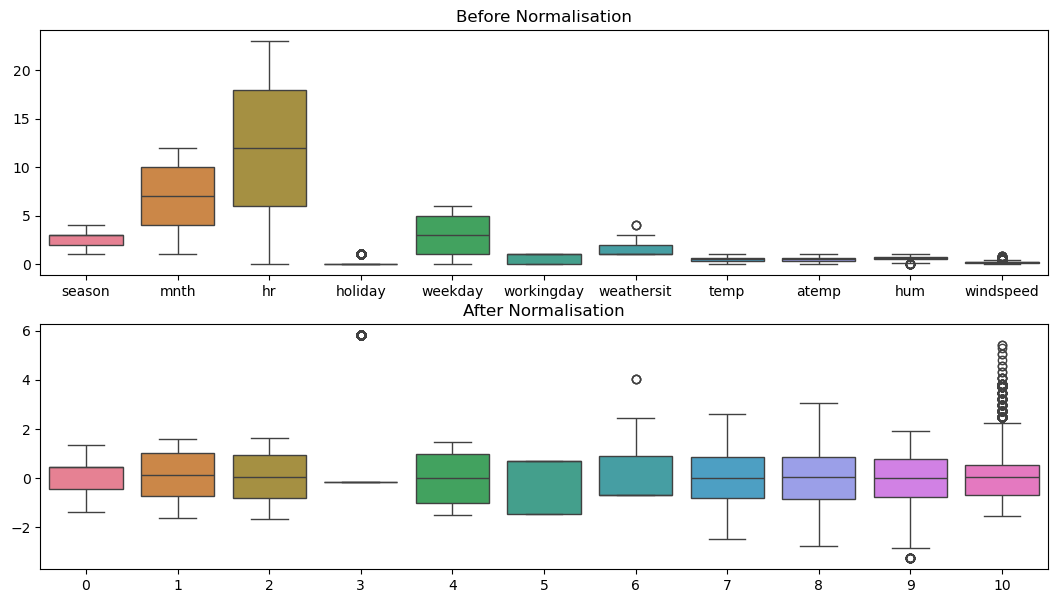

In [23]:
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

fig, ax = plt.subplots(2, 1)
fig.set_size_inches(13, 7)
ax[0] = sns.boxplot(X, ax=ax[0])
ax[0].set_title("Before Normalisation")
ax[1] = sns.boxplot(Xs, ax=ax[1])
ax[1].set_title("After Normalisation")

#### Split the data into training and testing sets

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(f"Training set: {X_train.shape} {y_train.shape}")
print(f"Testing set: {X_test.shape} {y_test.shape}")

Training set: (13903, 11) (13903,)
Testing set: (3476, 11) (3476,)


### Using tensorflow to create a DNN

#### 1. Create the model

In [25]:
model = tf.keras.models.Sequential()

#### 2. Add the input layer

In [26]:
model.add(tf.keras.Input((X.shape[1],)))

#### 3. Add layers

In [27]:
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dense(32, activation="relu"))

#### 4. Add output layer

In [28]:
model.add(tf.keras.layers.Dense(1, activation="linear"))

#### 5. Configure the model with optimiser, loss function and metrics

`metrics` is the methods to evaluate the model performance

In [29]:
model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["mse"])

#### 6. Show the current structure of the model

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                768       
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 19,457
Trainable params: 19,457
Non-trainable params: 0
_________________________________________________________________


#### 7. Train the model

In [31]:
history = model.fit(X_train, y_train, batch_size=32, epochs=100, verbose=1)

Epoch 1/100
435/435 [==============================] - 1s 1ms/step - loss: 27506.7539 - mse: 27506.7539
Epoch 2/100
435/435 [==============================] - 1s 1ms/step - loss: 19301.6934 - mse: 19301.6934
Epoch 3/100
435/435 [==============================] - 1s 1ms/step - loss: 16992.4746 - mse: 16992.4746
Epoch 4/100
435/435 [==============================] - 1s 1ms/step - loss: 15903.7041 - mse: 15903.7041
Epoch 5/100
435/435 [==============================] - 1s 1ms/step - loss: 15247.8047 - mse: 15247.8047
Epoch 6/100
435/435 [==============================] - 1s 1ms/step - loss: 14629.7832 - mse: 14629.7832
Epoch 7/100
435/435 [==============================] - 1s 1ms/step - loss: 14333.7119 - mse: 14333.7119
Epoch 8/100
435/435 [==============================] - 1s 1ms/step - loss: 13837.2295 - mse: 13837.2295
Epoch 9/100
435/435 [==============================] - 1s 1ms/step - loss: 13579.5811 - mse: 13579.5811
Epoch 10/100
435/435 [==============================] - 1s 1ms/s

#### Evaluate the RMSE of the trained model on training and testing sets

In [43]:
scores = model.evaluate(X_train, y_train, verbose=0)
print(f"Training RMSE: {np.sqrt(scores)[1]}")
scores = model.evaluate(X_test, y_test, verbose=0)
print(f"Testing RMSE: {np.sqrt(scores)[1]}")

Training RMSE: 61.91923529258699
Testing RMSE: 71.29655482888882


## Assignment 1:

The following cells are for the Assignment 1. It also implement K-fold Cross Validation.

In [1]:
from ucimlrepo import fetch_ucirepo 

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import KFold

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from sklearn.model_selection import KFold

In [2]:
# fetch dataset 
bike_sharing = fetch_ucirepo(id=275) 

# data (as pandas dataframes) 
X = bike_sharing.data.features 
y = bike_sharing.data.targets 

# convert y to shape of (samples, )
y = np.array(object=y)
y = y.ravel()

In [3]:
X = X.drop(["dteday", "yr"], axis=1)

In [4]:
print(np.percentile(y, 0),
np.percentile(y, 25),
np.percentile(y, 50),
np.percentile(y, 75),
np.percentile(y, 100), 
y.mean())


1.0 40.0 142.0 281.0 977.0 189.46308763450142


In [5]:
X = np.array(X)

In [8]:
kfold = KFold(n_splits=7)

mse = []
histories = []
  
def my_model():
  model = Sequential()
  model.add(Input(X.shape[1]))
  model.add(Dense(64, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation="relu"))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation="relu"))
  model.add(Dense(1, activation="linear"))
  model.compile(optimizer="adam", loss="mean_squared_error")
  print(model.summary())
  return model


for train, test in kfold.split(X=X, y=y):
  model = my_model()
  histories.append(model.fit(X[train], y[train], batch_size=32, epochs=100, verbose=1))
  training_score = model.evaluate(X[train], y[train])
  testing_score = model.evaluate(X[test], y[test])
  mse.append([training_score, testing_score])


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dense_15 (Dense)            (None, 1)                 65        
                                                                 
Total params: 9,153
Trainable params: 9,153
Non-traina

Mean Squared Error: 
Training	Testing
[[ 75.37214314 105.59958089]
 [ 74.59335397  93.16724608]
 [ 68.69021904 126.5828263 ]
 [ 76.07452593  90.34179077]
 [ 71.61572802 135.86672008]
 [ 70.17034588 119.37603075]
 [ 69.34413376 127.7124532 ]]

Average Mean Squared Error: 
[72.32081989657884, 115.28668077428065]


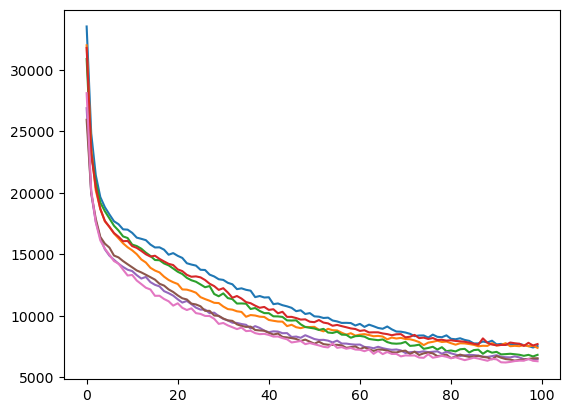

In [10]:
for i in range(0, len(histories)):
  plt.plot(histories[i].history['loss'])

mse = np.array(mse)
print("Mean Squared Error: ")
print("Training\tTesting")
print(np.sqrt(mse))

averageMSE = [np.sqrt(np.mean(mse[:, 0])), np.sqrt(np.mean(mse[:, 1]))]
print()
print("Average Mean Squared Error: ")
print(averageMSE)